In [1]:
import matplotlib.pyplot as plt
import torch
from speech_vae import VAE2D as SpeechVAE
from neural_vae import VAE as NeuralVAE
from latent_mapper import LatentMapper, ContrastiveMapper
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [2]:
neural_data = torch.load('training_data/data_warped_neural.pt', weights_only=True)
speech_data = torch.load('training_data/data_warped_speech.pt', weights_only=True)

In [4]:
# Create output directory if it doesn't exist
os.makedirs('training_data/for_encodec_neural', exist_ok=True)

# Save each sample individually with zero-padded numbering
for i in range(len(neural_data)):
    # Expand along dimension 0 to add batch dimension
    sample = neural_data[i].unsqueeze(0)
    # Save with zero-padded 4-digit number
    filename = f'training_data/for_encodec_neural/{i:04d}.pt'
    torch.save(sample, filename)


KeyboardInterrupt: 

In [4]:
# Create output directory if it doesn't exist
os.makedirs('training_data/for_encodec_speech', exist_ok=True)

# Save each sample individually with zero-padded numbering
for i in range(len(speech_data)):
    # Expand along dimension 0 to add batch dimension
    sample = speech_data[i].unsqueeze(0)
    # Save with zero-padded 4-digit number
    filename = f'training_data/for_encodec_speech/{i:04d}.pt'
    torch.save(sample, filename)


RuntimeError: [enforce fail at inline_container.cc:603] . unexpected pos 448 vs 342

In [3]:
neural_vae = NeuralVAE(
    input_channels=75,  
    input_length=27,  
    hidden_dim=256,   
    latent_dim=32    
).to('cuda')  
speech_vae = SpeechVAE(
    input_channels=1,
    height=128,
    width=56,
    hidden_dim=256,
    latent_dim=32
).to('cuda') 

neural_vae.load_state_dict(torch.load('training_data/model_neural_1dvae.pt', weights_only=True))
speech_vae.load_state_dict(torch.load('training_data/model_speech_2dvae.pt', weights_only=True))

neural_vae.eval()
speech_vae.eval()
neural_vae.eval()
speech_vae.eval()

Initializing decoder convolutional layers


VAE2D(
  (encoder_conv): Sequential(
    (0): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

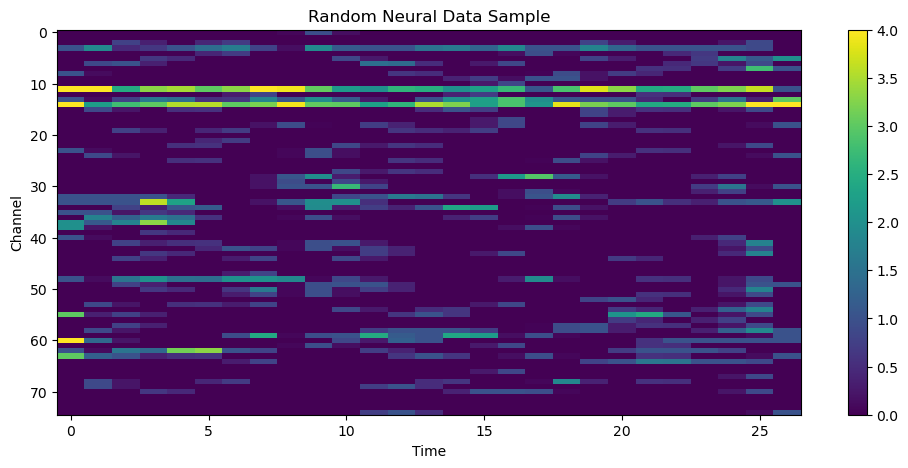

In [4]:
# Plot a random neural data sample
plt.figure(figsize=(12, 5))
random_idx = torch.randint(0, len(neural_data), (1,)).item()
plt.imshow(neural_data[random_idx].numpy(), aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Random Neural Data Sample')
plt.xlabel('Time')
plt.ylabel('Channel')
plt.show()


In [5]:
random_indices = torch.randint(0, len(neural_data), (10,))
neural_data_sample = neural_data[random_indices]
speech_data_sample = speech_data[random_indices]

# Latent mapper

## Neuro2voc

In [6]:
neuro2voc_latent_mapper = LatentMapper(32, 32).to('cuda')
neuro2voc_latent_mapper.load_state_dict(torch.load('training_data/neuro2voc_latent_mapper.pt'))
neuro2voc_latent_mapper.eval()

C:\Users\askrb\AppData\Local\Temp\ipykernel_22752\3074688214.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  neuro2voc_latent_mapper.load_state_dict(torch.load('training

RuntimeError: Error(s) in loading state_dict for LatentMapper:
	Missing key(s) in state_dict: "conv_block.0.weight", "conv_block.0.bias", "conv_block.2.weight", "conv_block.2.bias", "conv_block.4.weight", "conv_block.4.bias", "mlp.0.weight", "mlp.0.bias", "mlp.2.weight", "mlp.2.bias", "mlp.4.weight", "mlp.4.bias". 
	Unexpected key(s) in state_dict: "conv_block1.0.weight", "conv_block1.0.bias", "conv_block1.2.weight", "conv_block1.2.bias", "attention.q.weight", "attention.q.bias", "attention.k.weight", "attention.k.bias", "attention.v.weight", "attention.v.bias", "mlp1.0.weight", "mlp1.0.bias", "mlp1.2.weight", "mlp1.2.bias", "mlp2.0.weight", "mlp2.0.bias", "mlp2.2.weight", "mlp2.2.bias", "final.0.weight", "final.0.bias", "final.2.weight", "final.2.bias", "skip1.weight", "skip1.bias", "skip2.weight", "skip2.bias". 

In [8]:
neuro2voc_mapper = ContrastiveMapper(32).to('cuda')
neuro2voc_mapper.load_state_dict(torch.load('training_data/neuro2voc_latent_mapper.pt'))
neuro2voc_mapper.eval()

C:\Users\askrb\AppData\Local\Temp\ipykernel_22752\2193805182.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  neuro2voc_mapper.load_state_dict(torch.load('training_data/n

RuntimeError: Error(s) in loading state_dict for ContrastiveMapper:
	Missing key(s) in state_dict: "source_encoder.0.weight", "source_encoder.0.bias", "source_encoder.2.weight", "source_encoder.2.bias", "source_encoder.2.running_mean", "source_encoder.2.running_var", "target_encoder.0.weight", "target_encoder.0.bias", "target_encoder.2.weight", "target_encoder.2.bias", "target_encoder.2.running_mean", "target_encoder.2.running_var", "cross_attention.q.weight", "cross_attention.q.bias", "cross_attention.k.weight", "cross_attention.k.bias", "cross_attention.v.weight", "cross_attention.v.bias", "diff_branch.0.weight", "diff_branch.0.bias", "diff_branch.2.weight", "diff_branch.2.bias", "diff_branch.2.running_mean", "diff_branch.2.running_var", "diff_branch.3.weight", "diff_branch.3.bias", "sim_branch.0.weight", "sim_branch.0.bias", "sim_branch.2.weight", "sim_branch.2.bias", "sim_branch.2.running_mean", "sim_branch.2.running_var", "sim_branch.3.weight", "sim_branch.3.bias", "final.2.running_mean", "final.2.running_var", "final.4.weight", "final.4.bias", "final.6.weight", "final.6.bias", "final.6.running_mean", "final.6.running_var", "final.7.weight", "final.7.bias". 
	Unexpected key(s) in state_dict: "conv_block1.0.weight", "conv_block1.0.bias", "conv_block1.2.weight", "conv_block1.2.bias", "attention.q.weight", "attention.q.bias", "attention.k.weight", "attention.k.bias", "attention.v.weight", "attention.v.bias", "mlp1.0.weight", "mlp1.0.bias", "mlp1.2.weight", "mlp1.2.bias", "mlp2.0.weight", "mlp2.0.bias", "mlp2.2.weight", "mlp2.2.bias", "skip1.weight", "skip1.bias", "skip2.weight", "skip2.bias". 
	size mismatch for final.0.weight: copying a param with shape torch.Size([128, 256]) from checkpoint, the shape in current model is torch.Size([512, 768]).
	size mismatch for final.0.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for final.2.weight: copying a param with shape torch.Size([32, 128]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for final.2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([512]).

In [33]:
import torch.nn as nn
import torch.nn.functional as F

class LatentMapper(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=256):
        super().__init__()
        self.mapper = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    
    def forward(self, x):
        return self.mapper(x)

In [34]:
neuro2voc_mapper = LatentMapper(32, 32).to('cuda')
neuro2voc_mapper.load_state_dict(torch.load('training_data/trained_mapper_stage2_1.pt'))
neuro2voc_mapper.eval()

with torch.no_grad():
    # Get neural latent embedding
    neural_data_sample = neural_data_sample.to('cuda')
    neural_latent, _ = neural_vae.encode(neural_data_sample)
    
    # Map neural latent to speech latent using LatentMapper instead of ContrastiveMapper
    predicted_speech_latent = neuro2voc_mapper(neural_latent)
    
    # Decode to get speech output
    generated_speech = speech_vae.decode(predicted_speech_latent)
    generated_speech = generated_speech.squeeze()

# Store outputs
original_speech = speech_data_sample
generated_speech = generated_speech.cpu()

print("Neural data shape:", neural_data_sample.shape)
print("Neural latent shape:", neural_latent.shape)
print("Predicted speech latent shape:", predicted_speech_latent.shape)
print("Generated speech shape:", generated_speech.shape)
print("Original speech shape:", original_speech.shape)

Neural data shape: torch.Size([10, 75, 27])
Neural latent shape: torch.Size([10, 32])
Predicted speech latent shape: torch.Size([10, 32])
Generated speech shape: torch.Size([10, 128, 56])
Original speech shape: torch.Size([10, 128, 56])


C:\Users\askrb\AppData\Local\Temp\ipykernel_22752\345825855.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  neuro2voc_mapper.load_state_dict(torch.load('training_data/tr

In [37]:
voc2neuro_mapper = LatentMapper(32, 32).to('cuda')
voc2neuro_mapper.load_state_dict(torch.load('training_data/trained_mapper_stage2_2.pt'))
voc2neuro_mapper.eval()

with torch.no_grad():
    # Get neural latent embedding
    speech_latent, _ = speech_vae.encode(speech_data_sample)
    
    # Map neural latent to speech latent using LatentMapper
    predicted_neural_latent = voc2neuro_mapper(speech_latent)
    
    # Decode to get speech output
    generated_neural = neural_vae.decode(predicted_neural_latent)
    generated_neural = generated_neural.squeeze()

# Store outputs
generated_neural = generated_neural.cpu()
original_neural = neural_data_sample.cpu()
print("Original neural shape:", original_neural.shape)
print("Predicted neural latent shape:", generated_neural.shape)

Original neural shape: torch.Size([10, 75, 27])
Predicted neural latent shape: torch.Size([10, 75, 27])


C:\Users\askrb\AppData\Local\Temp\ipykernel_22752\4197547073.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  voc2neuro_mapper.load_state_dict(torch.load('training_data/t

## Voice to neural
Stop here if you run the previous code, skip to plot

In [7]:
voc2neuro_latent_mapper = LatentMapper(32, 32).to('cuda')
voc2neuro_latent_mapper.load_state_dict(torch.load('training_data/voc2neuro_latent_mapper.pt'))
voc2neuro_latent_mapper.eval()

C:\Users\askrb\AppData\Local\Temp\ipykernel_38408\2164891264.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  voc2neuro_latent_mapper.load_state_dict(torch.load('training

RuntimeError: Error(s) in loading state_dict for LatentMapper:
	Missing key(s) in state_dict: "conv_block.0.weight", "conv_block.0.bias", "conv_block.2.weight", "conv_block.2.bias", "conv_block.4.weight", "conv_block.4.bias", "mlp.0.weight", "mlp.0.bias", "mlp.2.weight", "mlp.2.bias", "mlp.4.weight", "mlp.4.bias". 
	Unexpected key(s) in state_dict: "mapper.0.weight", "mapper.0.bias", "mapper.2.weight", "mapper.2.bias", "mapper.2.running_mean", "mapper.2.running_var", "mapper.2.num_batches_tracked", "mapper.4.weight", "mapper.4.bias", "mapper.6.weight", "mapper.6.bias", "mapper.6.running_mean", "mapper.6.running_var", "mapper.6.num_batches_tracked", "mapper.8.weight", "mapper.8.bias". 

In [19]:
speech_data_sample = speech_data_sample.float()

# Run the pipeline to generate neural data from speech
with torch.no_grad():
    # Get speech latent embedding
    speech_data_sample = speech_data_sample.to('cuda')
    speech_latent, _ = speech_vae.encode(speech_data_sample)
    
    # Map speech latent to neural latent
    predicted_neural_latent = voc2neuro_latent_mapper(speech_latent)
    
    # Decode to get neural output
    generated_neural = neural_vae.decode(predicted_neural_latent)
    generated_neural = generated_neural.squeeze()

# Store outputs and move to CPU
original_neural = neural_data_sample.cpu()  # Move to CPU before numpy conversion
generated_neural = generated_neural.cpu()

# Print shapes for verification
print("Speech data shape:", speech_data_sample.shape)
print("Speech latent shape:", speech_latent.shape) 
print("Predicted neural latent shape:", predicted_neural_latent.shape)
print("Generated neural shape:", generated_neural.shape)
print("Original neural shape:", original_neural.shape)


NameError: name 'voc2neuro_latent_mapper' is not defined

# Contrastive mapper

In [10]:
neuro2voc_mapper = ContrastiveMapper(32).to('cuda') 
# voc2neuro_mapper = ContrastiveMapper(32).to('cuda')

neuro2voc_mapper.load_state_dict(torch.load('training_data/neuro2voc_contrastive_mapper.pt'))
# voc2neuro_mapper.load_state_dict(torch.load('training_data/contrastive_mapper_voc2neuro.pt'))

neuro2voc_mapper.eval()
# voc2neuro_mapper.eval()

C:\Users\askrb\AppData\Local\Temp\ipykernel_38408\1464571393.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  neuro2voc_mapper.load_state_dict(torch.load('training_data/n

RuntimeError: Error(s) in loading state_dict for ContrastiveMapper:
	Missing key(s) in state_dict: "source_encoder.0.weight", "source_encoder.0.bias", "source_encoder.2.weight", "source_encoder.2.bias", "source_encoder.2.running_mean", "source_encoder.2.running_var", "target_encoder.0.weight", "target_encoder.0.bias", "target_encoder.2.weight", "target_encoder.2.bias", "target_encoder.2.running_mean", "target_encoder.2.running_var", "cross_attention.q.weight", "cross_attention.q.bias", "cross_attention.k.weight", "cross_attention.k.bias", "cross_attention.v.weight", "cross_attention.v.bias", "diff_branch.0.weight", "diff_branch.0.bias", "diff_branch.2.weight", "diff_branch.2.bias", "diff_branch.2.running_mean", "diff_branch.2.running_var", "diff_branch.3.weight", "diff_branch.3.bias", "sim_branch.0.weight", "sim_branch.0.bias", "sim_branch.2.weight", "sim_branch.2.bias", "sim_branch.2.running_mean", "sim_branch.2.running_var", "sim_branch.3.weight", "sim_branch.3.bias", "final.0.weight", "final.0.bias", "final.2.weight", "final.2.bias", "final.2.running_mean", "final.2.running_var", "final.4.weight", "final.4.bias", "final.6.weight", "final.6.bias", "final.6.running_mean", "final.6.running_var", "final.7.weight", "final.7.bias". 
	Unexpected key(s) in state_dict: "mapper.0.weight", "mapper.0.bias", "mapper.2.weight", "mapper.2.bias", "mapper.2.running_mean", "mapper.2.running_var", "mapper.2.num_batches_tracked", "mapper.4.weight", "mapper.4.bias", "mapper.6.weight", "mapper.6.bias", "mapper.6.running_mean", "mapper.6.running_var", "mapper.6.num_batches_tracked", "mapper.8.weight", "mapper.8.bias". 

In [14]:
def map_with_contrastive(source_data, source_vae, target_vae, mapper):
    with torch.no_grad():
        # Move source data to GPU and ensure float type
        source_data = source_data.to('cuda').float()
        
        # Encode source data
        source_mu, _ = source_vae.encode(source_data)
        
        # Map source latent to target latent space
        mapped_embedding = mapper(source_mu)
        
        # Decode to target domain
        generated_output = target_vae.decode(mapped_embedding)
        
        return generated_output

# Test neural to speech mapping
generated_speech = map_with_contrastive(
    neural_data_sample,
    neural_vae, 
    speech_vae,
    neuro2voc_mapper
)

# Test speech to neural mapping
# generated_neural = map_with_contrastive(
#     speech_data_sample,
#     speech_vae,
#     neural_vae, 
#     voc2neuro_mapper
# )

In [17]:
generated_speech = generated_speech.squeeze()
print("Generated speech shape:", generated_speech.shape)
print("Original speech shape:", speech_data_sample.shape)


Generated speech shape: torch.Size([10, 128, 56])
Original speech shape: torch.Size([10, 128, 56])


# Plot

## Neural to speech

In [23]:
import numpy as np

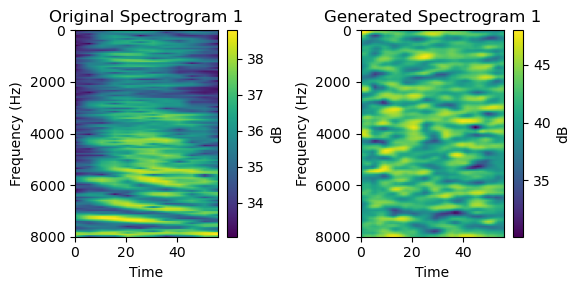

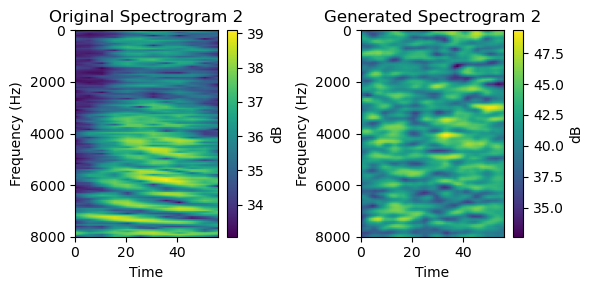

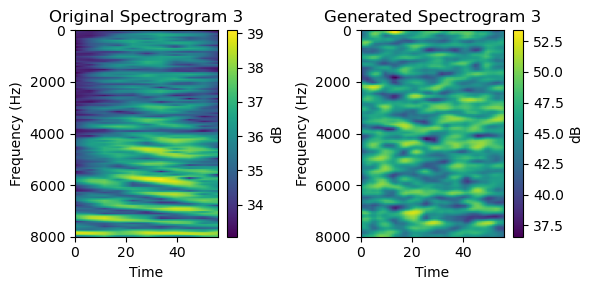

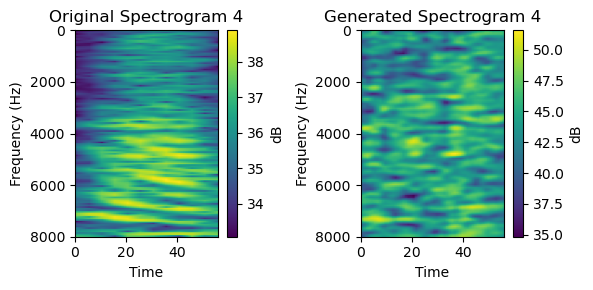

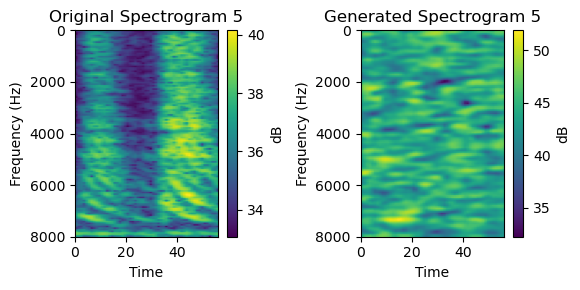

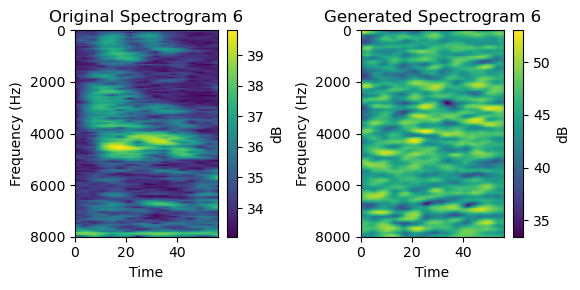

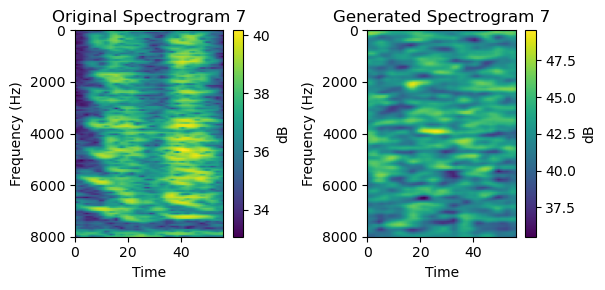

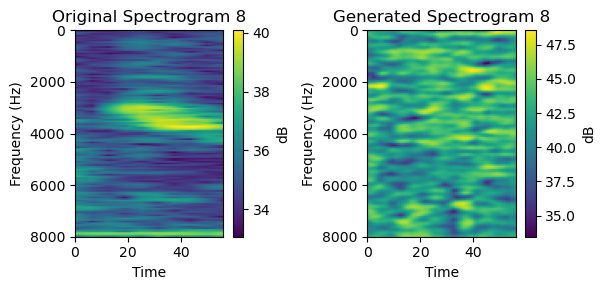

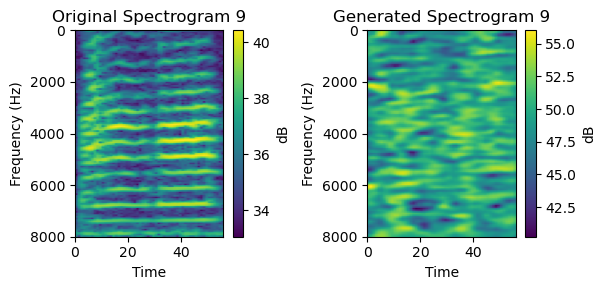

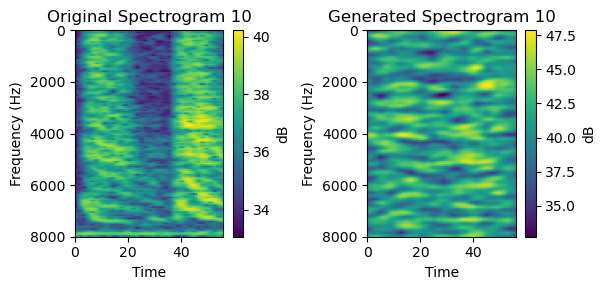

In [26]:
for i in range(len(generated_speech)):  # Use generated_speech length to avoid index error
    plt.figure(figsize=(6, 3))
    
    plt.subplot(121)
    # Convert amplitude to dB scale
    spec_db = 20 * np.log10(speech_data[i].cpu().numpy() + 1e-10)  # Using 20*log10 for amplitude to dB
    plt.imshow(spec_db, aspect='auto', cmap='viridis', origin='lower',
              extent=[0, speech_data[i].shape[1], 8000, 0])  # Reverse frequency axis
    plt.colorbar(label='dB')
    plt.title(f'Original Spectrogram {i+1}')
    plt.xlabel('Time') 
    plt.ylabel('Frequency (Hz)')
    
    plt.subplot(122)
    # Convert amplitude to dB scale
    gen_db = 20 * np.log10(generated_speech[i].cpu().numpy() + 1e-10)  # Using 20*log10 for amplitude to dB
    plt.imshow(gen_db, aspect='auto', cmap='viridis',
              extent=[0, generated_speech[i].shape[1], 8000, 0])  # Reverse frequency axis
    plt.colorbar(label='dB')
    plt.title(f'Generated Spectrogram {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    
    plt.tight_layout()
    plt.savefig(f'neuro2voc/neuro2voc{i+1}.png')
    plt.show()


## Speech to Neural

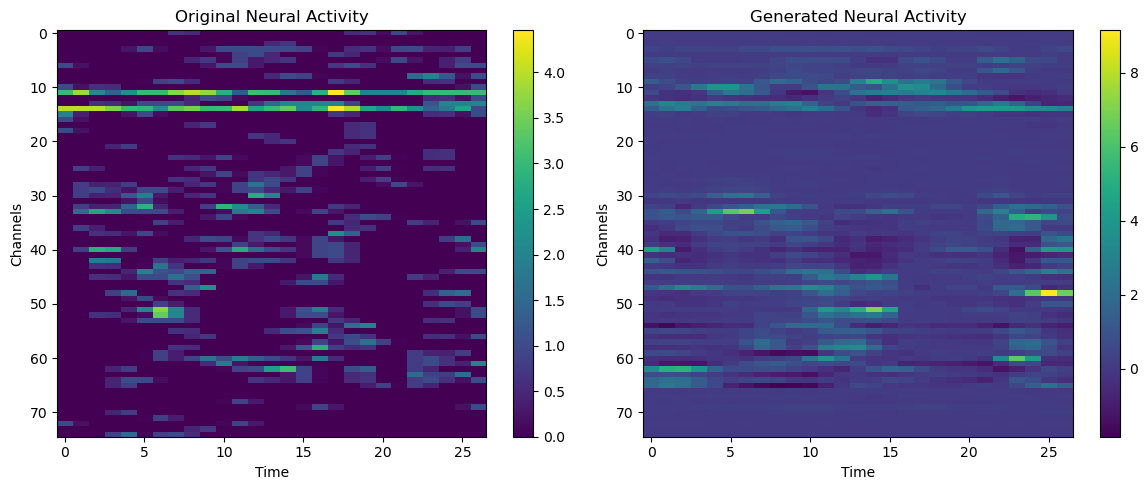

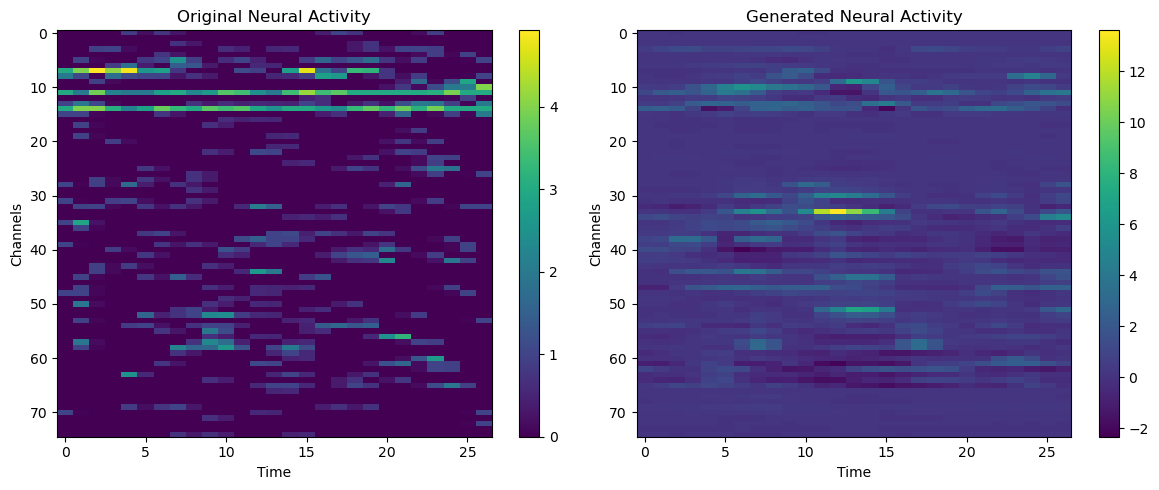

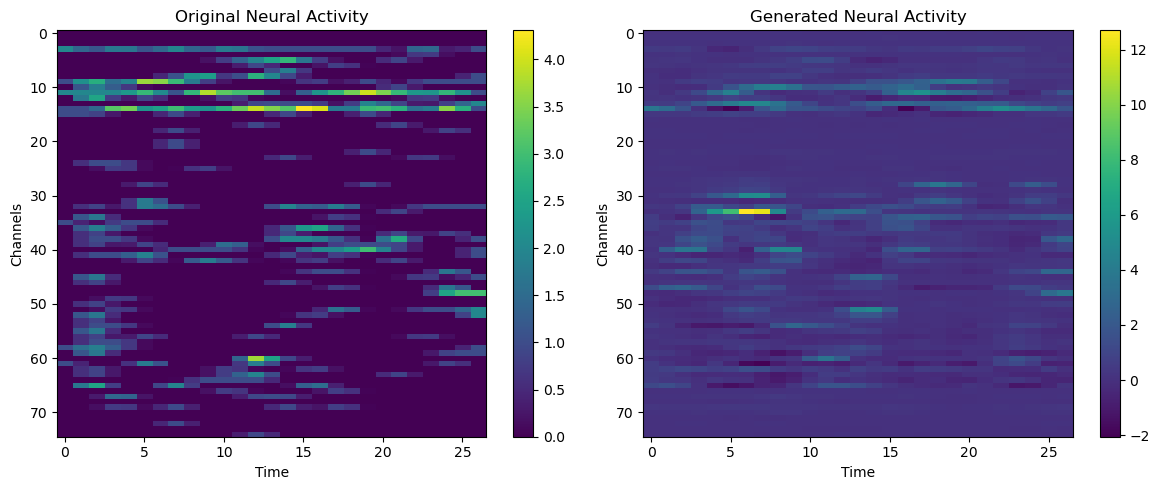

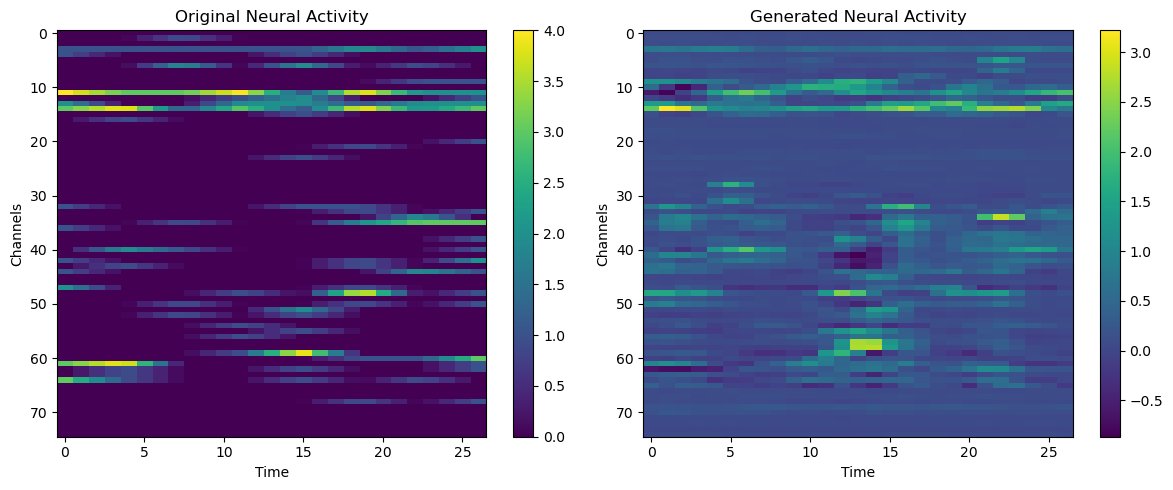

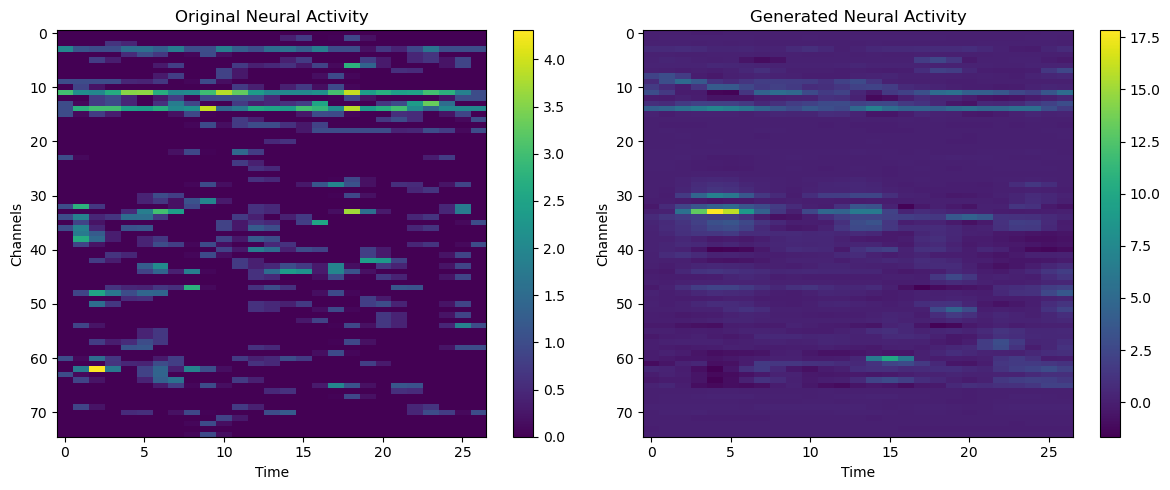

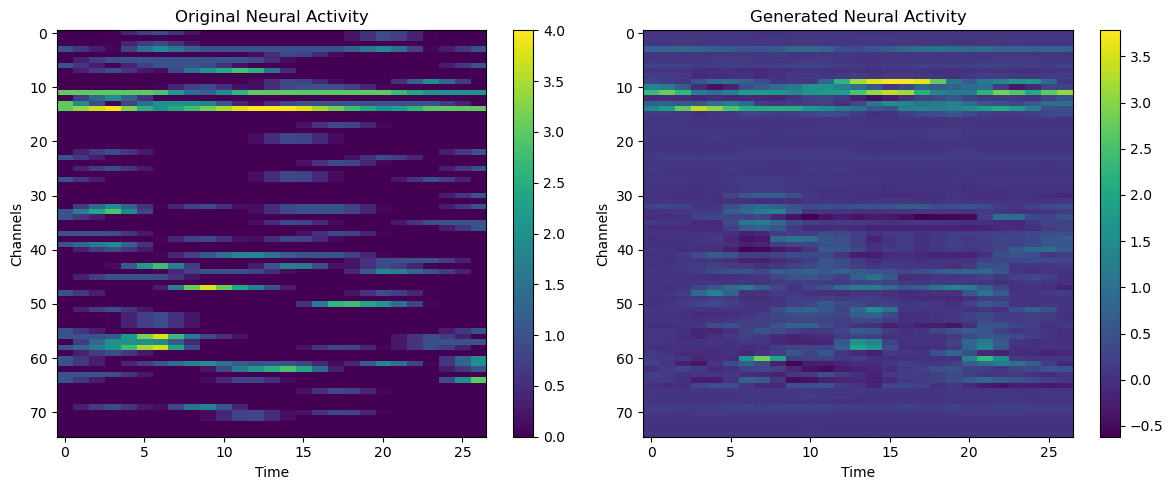

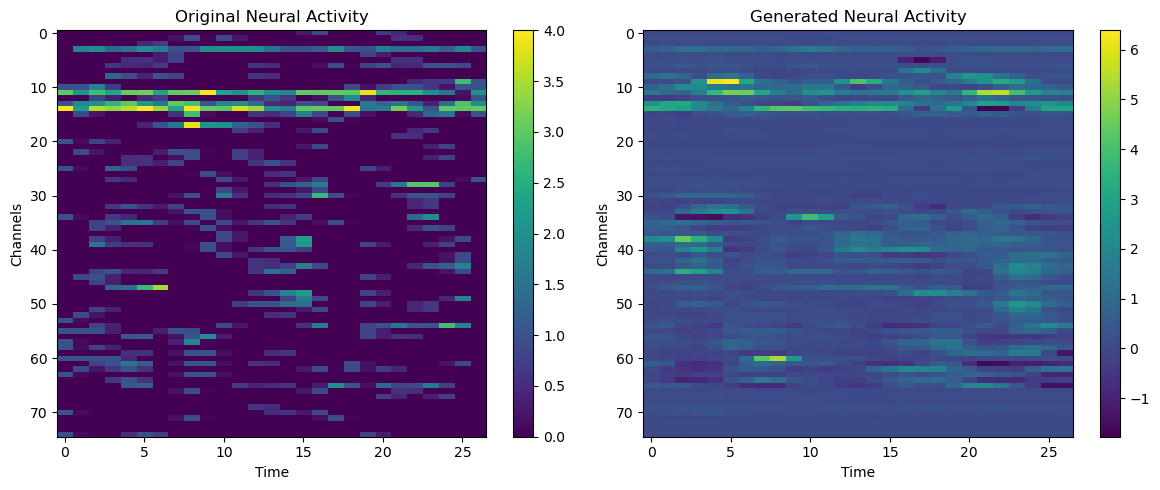

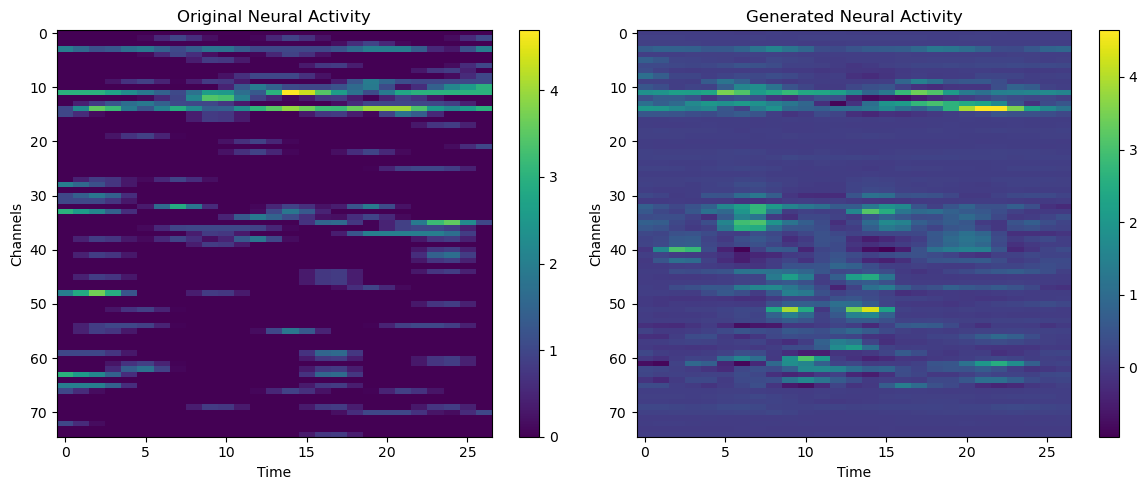

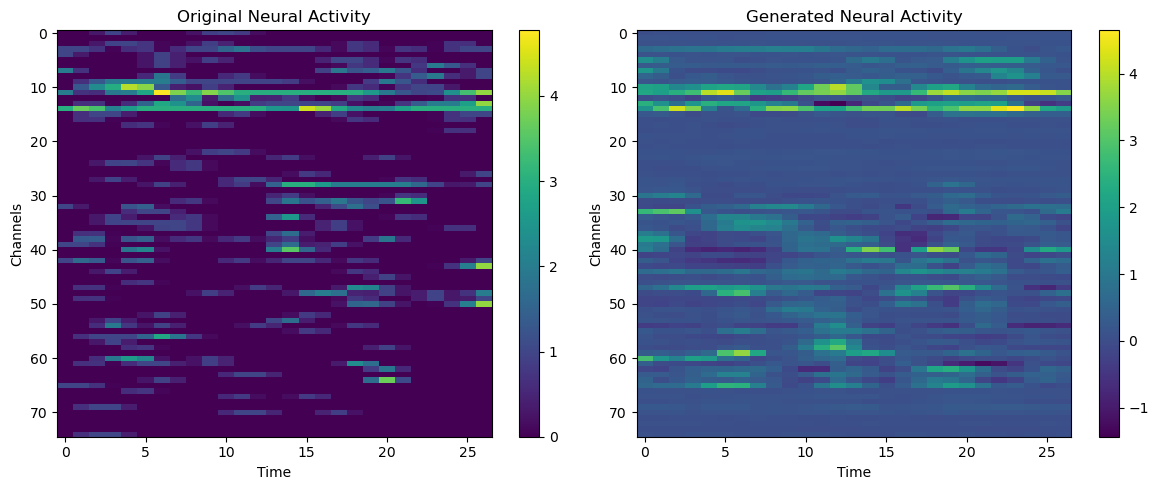

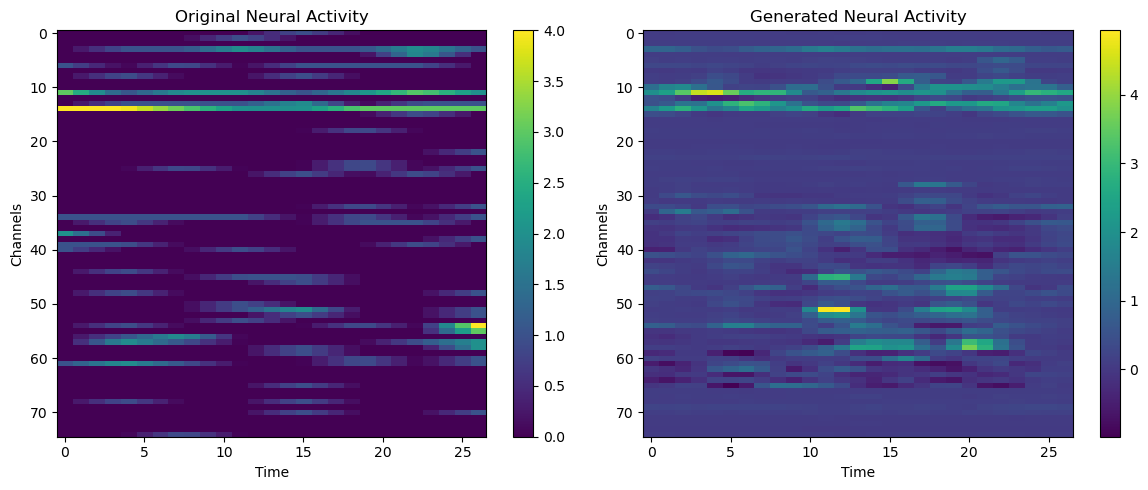

In [38]:
for i in range(len(speech_data_sample)):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    plt.imshow(original_neural[i].numpy(), aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title(f'Original Neural Activity')
    plt.xlabel('Time')
    plt.ylabel('Channels')
    
    plt.subplot(122)
    plt.imshow(generated_neural[i].numpy(), aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title(f'Generated Neural Activity')
    plt.xlabel('Time')
    plt.ylabel('Channels')
    
    plt.tight_layout()
    plt.savefig(f'visualization_results/voc2neuro/voc2neuro{i+1}.png')
    plt.show()


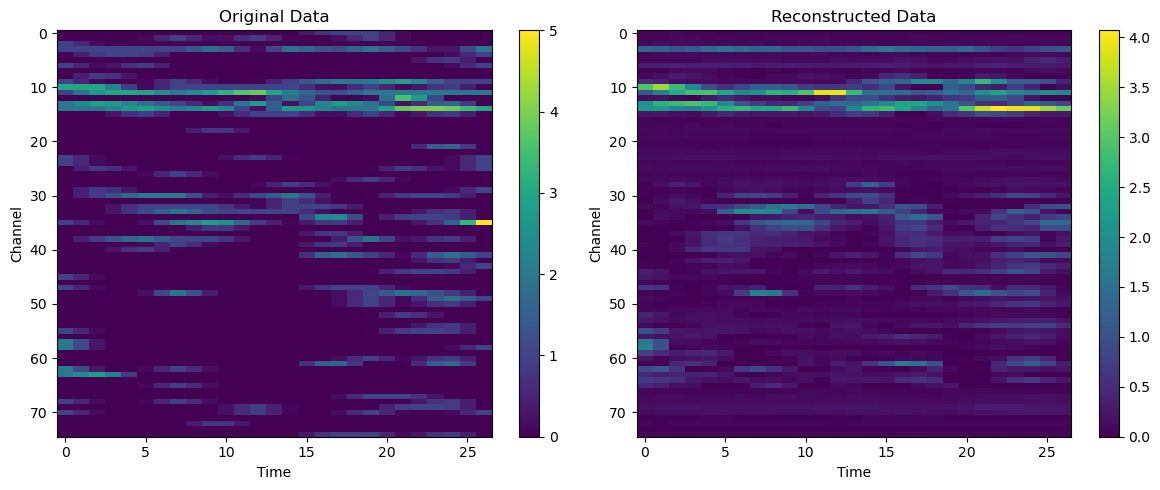

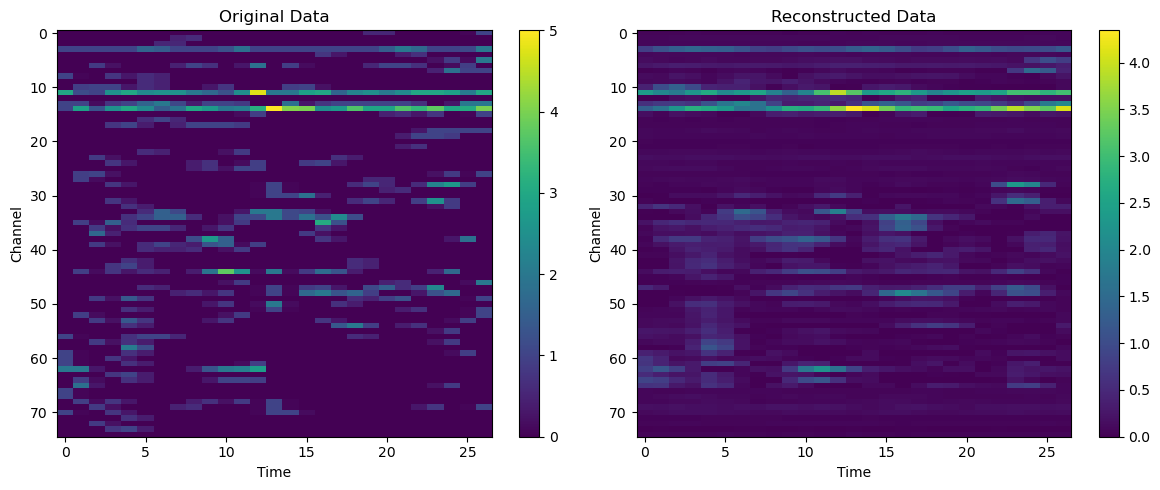

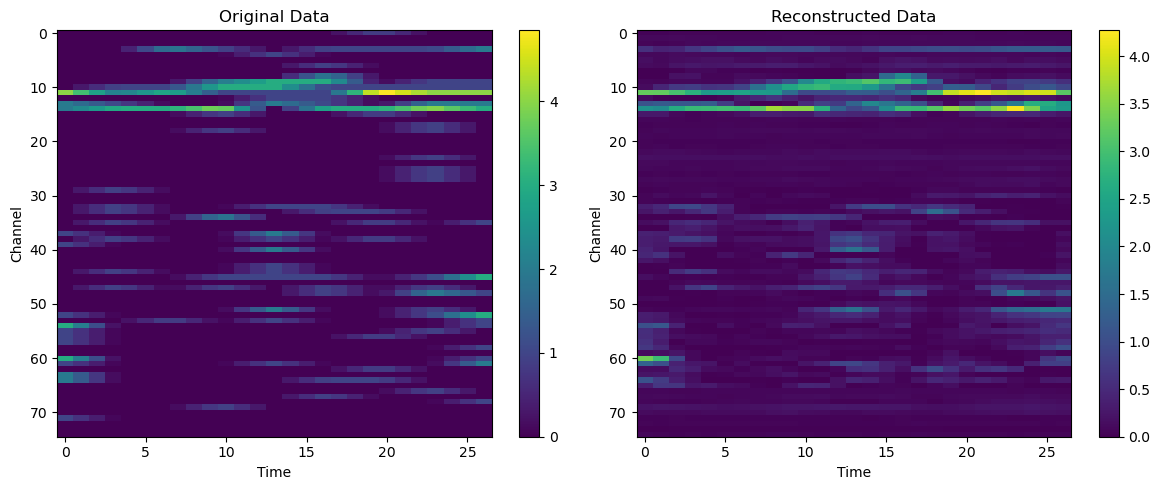

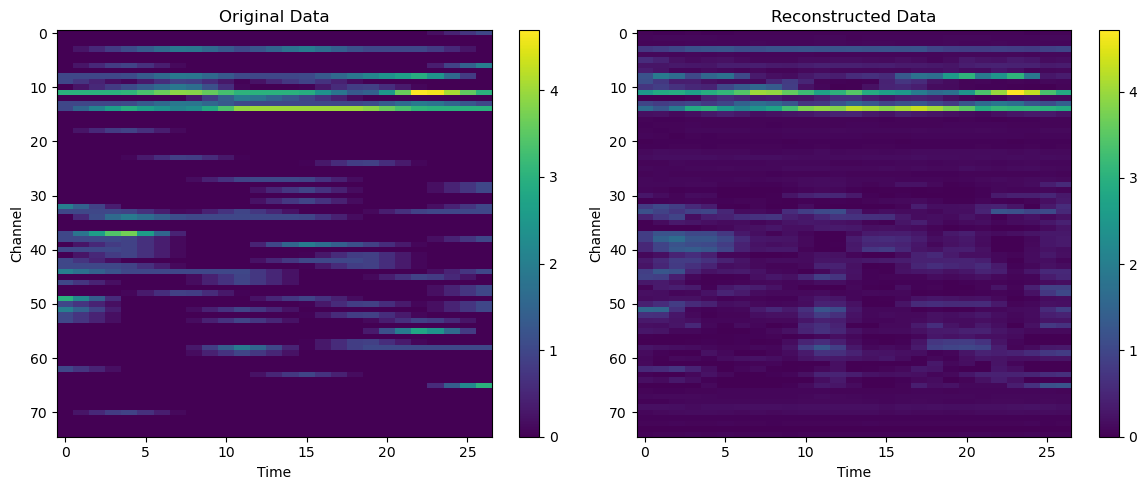

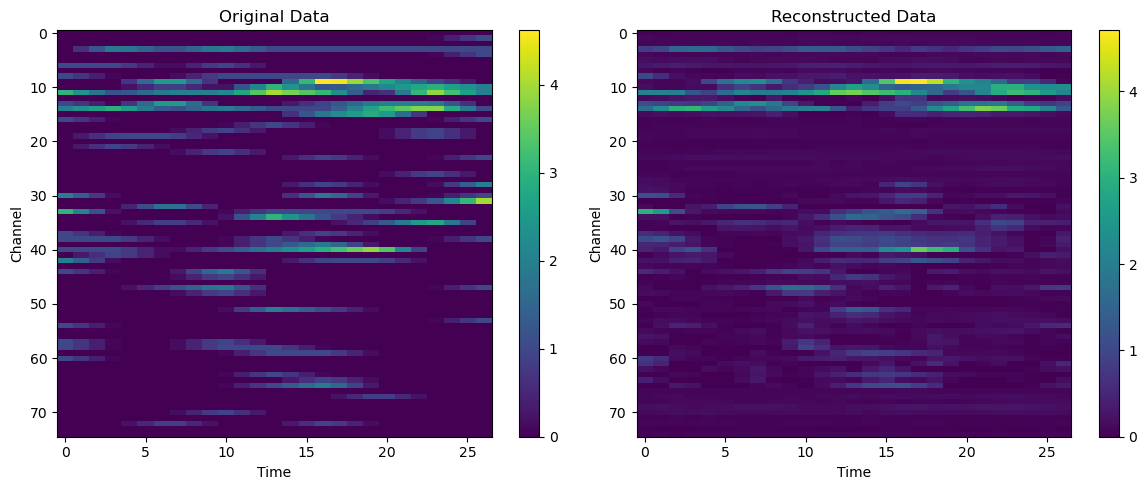

In [25]:
# Sample and visualize neural VAE reconstructions
def visualize_neural_reconstructions(neural_vae, neural_data, n_samples=5):
    # Randomly sample indices
    indices = np.random.choice(len(neural_data), n_samples, replace=False)
    samples = neural_data[indices]
    
    # Convert to tensor and add batch dimension if needed
    if not torch.is_tensor(samples):
        samples = torch.tensor(samples, dtype=torch.float32)
    if len(samples.shape) == 2:
        samples = samples.unsqueeze(1)  # Add channel dimension
        
    # Move samples to same device as model
    device = next(neural_vae.parameters()).device
    samples = samples.to(device)
        
    # Get reconstructions
    with torch.no_grad():
        recon, mu, logvar = neural_vae(samples)
        
    # Visualize original and reconstructed patterns
    for i in range(n_samples):
        plt.figure(figsize=(12, 5))
        
        # Original neural pattern
        plt.subplot(121)
        plt.imshow(samples[i].squeeze().cpu().numpy(), aspect='auto', cmap='viridis', vmin=0)
        plt.colorbar()
        plt.title(f'Original Data')
        plt.xlabel('Time')
        plt.ylabel('Channel')
        
        # Reconstructed pattern
        plt.subplot(122)
        plt.imshow(recon[i].squeeze().detach().cpu().numpy(), aspect='auto', cmap='viridis', vmin=0)
        plt.colorbar()
        plt.title(f'Reconstructed Data')
        plt.xlabel('Time')
        plt.ylabel('Channel')
        
        plt.tight_layout()
        plt.show()

# Run visualization
visualize_neural_reconstructions(neural_vae, neural_data_sample)
